## Preview Data by using pandas

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv('/content/dialogs.txt' , sep='\t' , names=['Question' , 'Answer'])

df.head()

,Question,Answer
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.


## Check for null values

In [3]:
# Check for null values
null_question = df['Question'].isnull().sum()
null_answer = df['Answer'].isnull().sum()

if null_question > 0:
    print("There are", null_question, "null values in the 'Question' column.")
else:
    print("There are no null values in the 'Question' column.")

if null_answer > 0:
    print("There are", null_answer, "null values in the 'Answer' column.")
else:
    print("There are no null values in the 'Answer' column.")

# Check for whitespace values
whitespace_question = df['Question'].apply(lambda x: x.isspace()).sum()
whitespace_answer = df['Answer'].apply(lambda x: x.isspace()).sum()

if whitespace_question > 0:
    print("There are", whitespace_question, "whitespace values in the 'Question' column.")
else:
    print("There are no whitespace values in the 'Question' column.")

if whitespace_answer > 0:
    print("There are", whitespace_answer, "whitespace values in the 'Answer' column.")
else:
    print("There are no whitespace values in the 'Answer' column.")

There are no null values in the 'Question' column.
There are no null values in the 'Answer' column.
There are no whitespace values in the 'Question' column.
There are no whitespace values in the 'Answer' column.


## Clean the data

In [4]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', ' ', text)  # Replace all digits with spaces
    text = re.sub(r'([^\w\s])', r' \1 ', text)  # Add a space before and after each punctuation character
    text = re.sub(r'\s+', ' ', text)  # Replace all consecutive spaces with a single space
    text = text.strip()  # Remove leading and trailing spaces
    return text

# df['Encoder Inputs']=df['Question'].apply(clean_text)
# df['Decoder Inputs']="<sos> " + df['Answer'].apply(clean_text) + ' <eos>'
# df["Decoder Targets"] = df['Answer'].apply(clean_text) + ' <eos>'
df['Encoder Inputs']=df['Question'].apply(clean_text)
df['Decoder Inputs']=df['Answer'].apply(clean_text)
df["Decoder Targets"] = df['Answer'].apply(clean_text)

df.head()

,Question,Answer,Encoder Inputs,Decoder Inputs,Decoder Targets
0,"hi, how are you doing?",i'm fine. how about yourself?,"hi , how are you doing ?",i ' m fine . how about yourself ?,i ' m fine . how about yourself ?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,i ' m fine . how about yourself ?,i ' m pretty good . thanks for asking .,i ' m pretty good . thanks for asking .
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,i ' m pretty good . thanks for asking .,no problem . so how have you been ?,no problem . so how have you been ?
3,no problem. so how have you been?,i've been great. what about you?,no problem . so how have you been ?,i ' ve been great . what about you ?,i ' ve been great . what about you ?
4,i've been great. what about you?,i've been good. i'm in school right now.,i ' ve been great . what about you ?,i ' ve been good . i ' m in school right now .,i ' ve been good . i ' m in school right now .


In [5]:
df['Question Length'] = df['Encoder Inputs'].apply(lambda x: len(x))
df['Answer Length'] = df['Decoder Inputs'].apply(lambda x: len(x))

df.head()

,Question,Answer,Encoder Inputs,Decoder Inputs,Decoder Targets,Question Length,Answer Length
0,"hi, how are you doing?",i'm fine. how about yourself?,"hi , how are you doing ?",i ' m fine . how about yourself ?,i ' m fine . how about yourself ?,24,33
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,i ' m fine . how about yourself ?,i ' m pretty good . thanks for asking .,i ' m pretty good . thanks for asking .,33,39
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,i ' m pretty good . thanks for asking .,no problem . so how have you been ?,no problem . so how have you been ?,39,35
3,no problem. so how have you been?,i've been great. what about you?,no problem . so how have you been ?,i ' ve been great . what about you ?,i ' ve been great . what about you ?,35,36
4,i've been great. what about you?,i've been good. i'm in school right now.,i ' ve been great . what about you ?,i ' ve been good . i ' m in school right now .,i ' ve been good . i ' m in school right now .,36,46


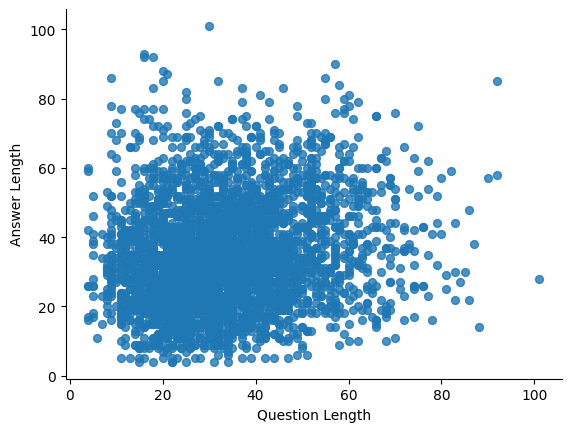

In [6]:
# @title Question Length vs Answer Length

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Question Length', y='Answer Length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import plotly.express as px

fig1 = px.histogram(df, x='Question Length', nbins=50, opacity=0.7)
fig2 = px.histogram(df, x='Answer Length', nbins=50, opacity=0.7)

print("Maximum Question Length:", df['Question Length'].max())
print("Maximum Answer Length:", df['Answer Length'].max())

fig1.show()
fig2.show()

Maximum Question Length: 101
Maximum Answer Length: 113


In [ ]:
# df.to_csv('processed_data.csv', index=False)
df.to_csv('new_processed_data.csv', index=False)
from google.colab import files

# files.download('processed_data.csv')
files.download('new_processed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Preparation and Import libraries for later model training

In [7]:
## to load the data
## import libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import csv
import random
import re
import os
import unicodedata
import codecs
from io import open
import itertools
import math
import json

USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")

# Load and Trim Data

In [8]:
# define the voc class
# Default word tokens
PAD_token = 0  # Used for padding short sentences
SOS_token = 1  # Start-of-sentence token
EOS_token = 2  # End-of-sentence token

class Voc:
    def __init__(self, name):
        self.name = name
        self.trimmed = False
        self.word2index = {}
        self.word2count = {}
        self.index2word = {SOS_token: "SOS", EOS_token: "EOS"}
        self.num_words = 2  # Count SOS, EOS, PAD

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.num_words
            self.word2count[word] = 1
            self.index2word[self.num_words] = word
            self.num_words += 1
        else:
            self.word2count[word] += 1

    # Remove words below a certain count threshold
    def trim(self, min_count):
        if self.trimmed:
            return
        self.trimmed = True

        keep_words = []

        for k, v in self.word2count.items():
            if v >= min_count:
                keep_words.append(k)

        print('keep_words {} / {} = {:.4f}'.format(
            len(keep_words), len(self.word2index), len(keep_words) / len(self.word2index)
        ))

        # Reinitialize dictionaries
        self.word2index = {}
        self.word2count = {}
        self.index2word = {SOS_token: "SOS", EOS_token: "EOS"}
        self.num_words = 2 # Count default tokens

        for word in keep_words:
            self.addWord(word)

In [9]:
import re
import unicodedata
import os

# Define MAX_LENGTH
MAX_LENGTH = 10  # Maximum sentence length to consider

# Turn a Unicode string to plain ASCII
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

# Lowercase, trim, and remove non-letter characters
def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    s = re.sub(r"([.!?])", r" \1", s)
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    s = re.sub(r"\s+", r" ", s).strip()
    return s

# Read query/response pairs and return a voc object
def readVocs(datafile, corpus_name):
    print("Reading lines...")
    # Read the file and split into lines
    lines = open(datafile, encoding='utf-8').read().strip().split('\n')
    # Split every line into pairs and normalize
    pairs = [[normalizeString(s) for s in l.split(',')] for l in lines]
    voc = Voc(corpus_name)
    return voc, pairs

# Returns True if both sentences in a pair 'p' are under the MAX_LENGTH threshold
def filterPair(p):
    return len(p[0].split(' ')) < MAX_LENGTH and len(p[1].split(' ')) < MAX_LENGTH

# Filter pairs using the filterPair condition
def filterPairs(pairs):
    return [pair for pair in pairs if filterPair(pair)]

# Using the functions defined above, return a populated voc object and pairs list
def loadPrepareData(corpus_name, datafile):
    print("Start preparing training data ...")
    voc, pairs = readVocs(datafile, corpus_name)
    print("Read {!s} sentence pairs".format(len(pairs)))
    pairs = filterPairs(pairs)
    print("Trimmed to {!s} sentence pairs".format(len(pairs)))
    print("Counting words...")
    for pair in pairs:
        voc.addSentence(pair[0])
        voc.addSentence(pair[1])
    print("Counted words:", voc.num_words)
    return voc, pairs

# Load/Assemble voc and pairs
corpus_name = "new_processed_data"
datafile = "new_processed_data.csv"
voc, pairs = loadPrepareData(corpus_name, datafile)
# Print some pairs to validate
print("\nPairs:")
for pair in pairs[:10]:
    print(pair)


Start preparing training data ...
Reading lines...
Read 3726 sentence pairs
Trimmed to 2618 sentence pairs
Counting words...
Counted words: 1925

Pairs:
['question', 'answer', 'encoder inputs', 'decoder inputs', 'decoder targets', 'question length', 'answer length']
['hi', 'how are you doing ?', 'i m fine . how about yourself ?', 'hi', 'how are you doing ?', 'i m fine . how about yourself ?', 'i m fine . how about yourself ?', '', '']
['i m fine . how about yourself ?', 'i m pretty good . thanks for asking .', 'i m fine . how about yourself ?', 'i m pretty good . thanks for asking .', 'i m pretty good . thanks for asking .', '', '']
['i m pretty good . thanks for asking .', 'no problem . so how have you been ?', 'i m pretty good . thanks for asking .', 'no problem . so how have you been ?', 'no problem . so how have you been ?', '', '']
['no problem . so how have you been ?', 'i ve been great . what about you ?', 'no problem . so how have you been ?', 'i ve been great . what about you 

In [10]:
'''
create a vocabulary and load query/response sentence pairs into memory.

Note that we are dealing with sequences of words, which do not have an implicit mapping to a discrete numerical space.
Thus, we must create one by mapping each unique word that we encounter in our dataset to an index value.

For this we define a Voc class, which keeps a mapping from words to indexes,
a reverse mapping of indexes to words, a count of each word and a total word count.
The class provides methods for adding a word to the vocabulary (addWord), adding all words in a sentence (addSentence) and trimming infrequently seen words (trim). More on trimming later.
'''
import pandas as pd

# Load the processed data from CSV file into a DataFrame
df = pd.read_csv('new_processed_data.csv')

# Define MIN_COUNT
MIN_COUNT = 1


# Function to trim rare words and filter pairs
def trimRareWords(voc, pairs, MIN_COUNT):
    # Trim words used under the MIN_COUNT from the voc
    voc.trim(MIN_COUNT)
    # Filter out pairs with trimmed words
    keep_pairs = []
    for pair in pairs:
        input_sentence = pair[0]
        output_sentence = pair[1]
        keep_input = True
        keep_output = True
        # Check input sentence
        for word in input_sentence.split(' '):
            if word not in voc.word2index:
                keep_input = False
                break
        # Check output sentence
        for word in output_sentence.split(' '):
            if word not in voc.word2index:
                keep_output = False
                break

        # Only keep pairs that do not contain trimmed word(s) in their input or output sentence
        if keep_input and keep_output:
            keep_pairs.append(pair)

    print("Trimmed from {} pairs to {}, {:.4f} of total".format(len(pairs), len(keep_pairs), len(keep_pairs) / len(pairs)))
    return keep_pairs

# Convert DataFrame rows to pairs list
pairs = df[['Encoder Inputs', 'Decoder Inputs']].values.tolist()

# Trim voc and pairs
pairs = trimRareWords(voc, pairs, MIN_COUNT)

# Now 'pairs' contains the filtered pairs without rare words



keep_words 1923 / 1923 = 1.0000
Trimmed from 3725 pairs to 953, 0.2558 of total


# Model Training and Accuracy


Epoch 1/100
47/47 [==============================] - 9s 128ms/step - loss: 3.0295 - accuracy: 0.6336 - val_loss: 2.4487 - val_accuracy: 0.6297
Epoch 2/100
47/47 [==============================] - 6s 124ms/step - loss: 2.0786 - accuracy: 0.6616 - val_loss: 2.1310 - val_accuracy: 0.6510
Epoch 3/100
47/47 [==============================] - 3s 72ms/step - loss: 1.8833 - accuracy: 0.6830 - val_loss: 2.0335 - val_accuracy: 0.6801
Epoch 4/100
47/47 [==============================] - 3s 69ms/step - loss: 1.7637 - accuracy: 0.7033 - val_loss: 1.9143 - val_accuracy: 0.6809
Epoch 5/100
47/47 [==============================] - 2s 46ms/step - loss: 1.6481 - accuracy: 0.7134 - val_loss: 1.8083 - val_accuracy: 0.6926
Epoch 6/100
47/47 [==============================] - 2s 42ms/step - loss: 1.5480 - accuracy: 0.7284 - val_loss: 1.7265 - val_accuracy: 0.7105
Epoch 7/100
47/47 [==============================] - 2s 38ms/step - loss: 1.4622 - accuracy: 0.7484 - val_loss: 1.6443 - val_accuracy: 0.7391
Epoc

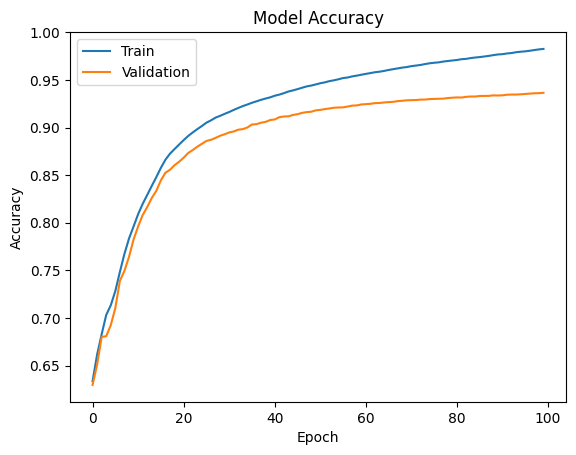

In [13]:

# Load the dataset
data_path = '/content/new_processed_data.csv'
data = pd.read_csv(data_path)

# Initialize tokenizer
tokenizer = Tokenizer(filters='')
tokenizer.fit_on_texts(data['Encoder Inputs'].tolist() + data['Decoder Inputs'].tolist())

# Convert text sequences to integer sequences
encoder_input_seq = tokenizer.texts_to_sequences(data['Encoder Inputs'].tolist())
decoder_input_seq = tokenizer.texts_to_sequences(data['Decoder Inputs'].tolist())
decoder_target_seq = tokenizer.texts_to_sequences(data['Decoder Targets'].tolist())

# Pad sequences to ensure uniform length
max_encoder_seq_length = max([len(txt) for txt in encoder_input_seq])
max_decoder_seq_length = max([len(txt) for txt in decoder_input_seq])

encoder_input_data = pad_sequences(encoder_input_seq, maxlen=max_encoder_seq_length, padding='post')
decoder_input_data = pad_sequences(decoder_input_seq, maxlen=max_decoder_seq_length, padding='post')
decoder_target_data = pad_sequences(decoder_target_seq, maxlen=max_decoder_seq_length, padding='post')

# One-hot encode the target sequences
decoder_target_data = np.array([to_categorical(sequence, num_classes=len(tokenizer.word_index) + 1) for sequence in decoder_target_data])

vocab_size = len(tokenizer.word_index) + 1

# Define the Seq2Seq model architecture
latent_dim = 256  # Latent dimensionality of the encoding space

# Encoder
encoder_inputs = Input(shape=(None,))
encoder_embedding = Embedding(vocab_size, latent_dim)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder
decoder_inputs = Input(shape=(None,))
decoder_embedding_layer = Embedding(vocab_size, latent_dim)
decoder_embedding = decoder_embedding_layer(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the Seq2Seq model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
                    batch_size=64,
                    epochs=100,
                    validation_split=0.2)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



# Testing for F1 score

In [26]:
# Define the encoder model for inference
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder setup
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

decoder_embedding_inf = decoder_embedding_layer(decoder_inputs)
decoder_outputs_inf, state_h_inf, state_c_inf = decoder_lstm(
    decoder_embedding_inf, initial_state=decoder_states_inputs)
decoder_states_inf = [state_h_inf, state_c_inf]
decoder_outputs_inf = decoder_dense(decoder_outputs_inf)

decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs_inf] + decoder_states_inf)

In [27]:
# Load the test dataset
with open('/content/test.txt', 'r') as file:
    test_content = file.readlines()

# Split each line into question and answer pairs
test_pairs = [line.strip().split("   ") for line in test_content if "   " in line]
test_questions = [pair[0].strip() for pair in test_pairs]
test_answers = [pair[1].strip() for pair in test_pairs]

# Preprocess the test questions
test_questions_seq = tokenizer.texts_to_sequences(test_questions)
test_questions_padded = pad_sequences(test_questions_seq, maxlen=max_encoder_seq_length, padding='post')


In [36]:
predicted_answers = [decode_sequence(np.array([seq])) for seq in test_questions_padded]

1/1 [==============================] - 0s 19ms/step


In [37]:
# Example placeholders for flattened lists of predicted and true tokens
flattened_predicted_tokens = [...]  # Flatten list of predicted tokens for all sentences
flattened_true_tokens = [...]  # Flatten list of true tokens corresponding to predicted tokens

In [38]:
matches = [1 if pred == true else 0 for pred, true in zip(flattened_predicted_tokens, flattened_true_tokens)]

In [39]:
from sklearn.metrics import f1_score

# Assuming all predictions are positive for this simplistic approach
y_true = matches
y_pred = [1] * len(y_true)  # All predictions are considered as attempts to match the true token

f1 = f1_score(y_true, y_pred, average='binary')
print(f"F1 Score: {f1}")


F1 Score: 1.0
